In [1]:
import GPRutils
import plotGPR

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [39]:
exp = 474265
dC = GPRutils.loadNPZ(f"../thesis/{exp}/{exp}.npz")
with open(f"../thesis/{exp}/out.out") as f:
    print("Band:", f.readlines()[1][-3])

Band: g


In [46]:
dC.params

array([ 5.09228362e+02, -2.90916170e-01,  1.09909840e-01, -3.29446441e-03,
       -1.45645315e-03])

In [40]:
x, y = dC.Xvalid.T*u.deg
dx, dy = dC.Yvalid.T*u.mas
err = np.sqrt(dC.Evalid_DES)*u.mas

x2, y2 = x, y
dx2, dy2 = dC.Yvalid.T*u.mas - dC.fbar_s.T*u.mas
err2 = err

In [41]:
xi = GPRutils.getXi(np.vstack([x, y]).T, np.vstack([dx, dy]).T)
xi2 = GPRutils.getXi(np.vstack([x, y]).T, np.vstack([dx2, dy2]).T)
ratio = xi[0] / xi2[0]
ratio

<Quantity 0.59307045>

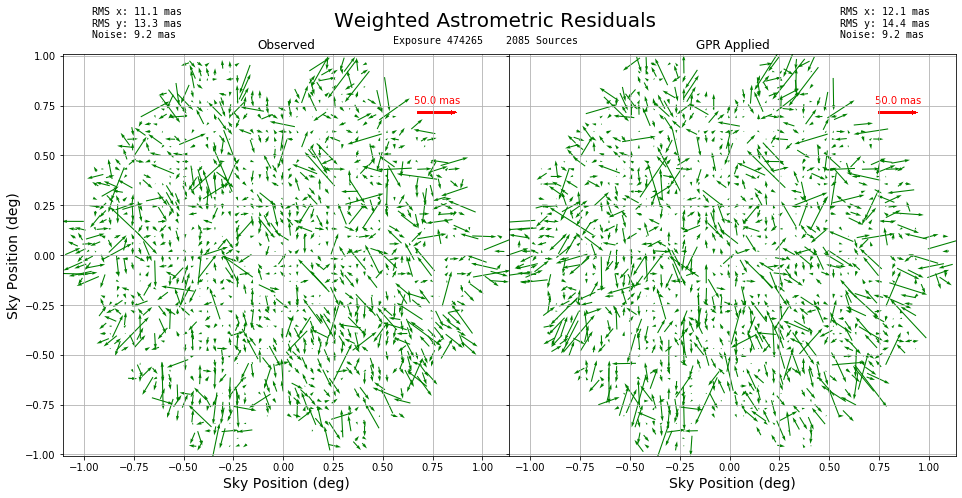

In [42]:
plotGPR.AstrometricResiduals(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dC.expNum,
    scale=256*u.mas,
    pixelsPerBin=512,
)

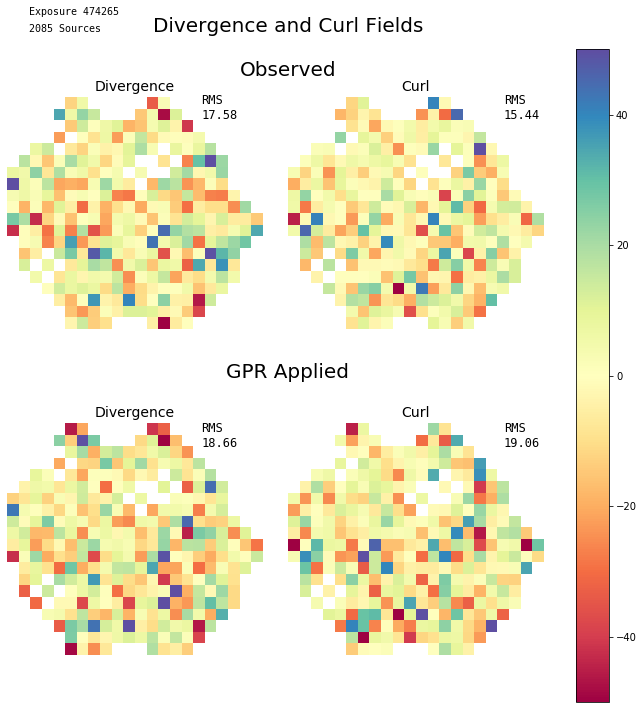

In [43]:
plotGPR.DivCurl(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dC.expNum,
    pixelsPerBin=1250,
)

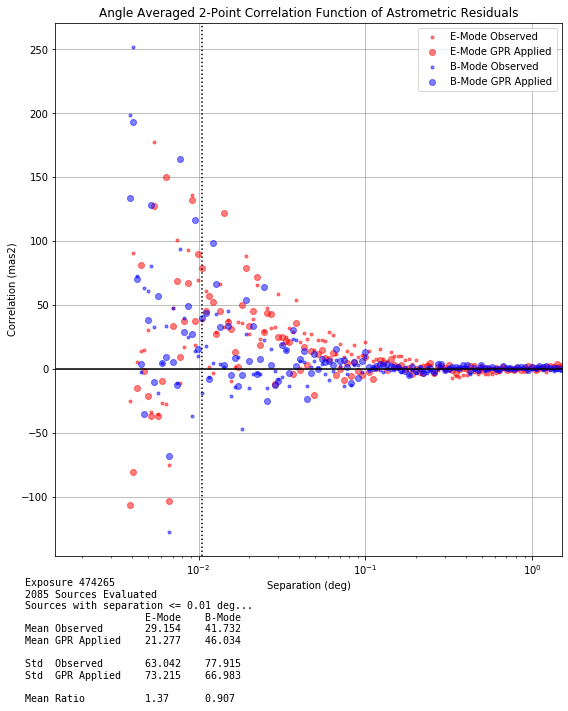

In [44]:
plotGPR.Correlation(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dC.expNum,
    ylim=(None, None),
#     xiB_ON=False,
#     xiE_ON=False,
#     xiplus_ON=True,
)

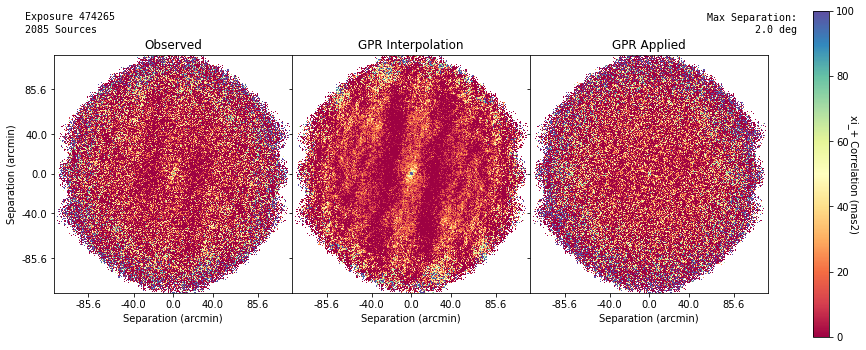

In [45]:
plotGPR.Correlation2D(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dC.expNum,
    nBins=75*4,
    vmin=0*u.mas**2,
    vmax=100*u.mas**2,
    rmax=0.5*4*u.deg,
)